# Imports:

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Sequence

# Classes:

In [10]:
class DiffusionLimitedAggregationRandomWalk:
    """
    the class to simulate the Diffusion Limited Aggregation Random Walk
    size is the size of the sample of simulation
    map is the map of the sample
    max height is the max y of the coloring points
    starting gap is the gap between the highest point anf the starting line witch we put the the init points randomly
    forgetting gap is the gap between highest point and the line witch we ignore the walk of the point
    steps is the total tries on adding points
    walks is the list of all the possible moves

    methods:
    step:
    run:
    show:
    colorFinalPoint:
    checkPoint:
    """
    def __init__(self, size: int, steps: int, startingGap: int, forgettingGap: int) -> None:
        """
        the function to construct the DiffusionLimitedAggregationRandomWalk object and init the map and set the gaps

        :param startingGap:
        :type startingGap:
        :param forgettingGap:
        :type forgettingGap:
        :param size:
        :type size:
        :param steps:
        :type steps:
        """
        self.forgettingGap = forgettingGap
        self.startingGap = startingGap
        self.size = int(size)
        self.map = np.zeros((size,size))
        self.map[:,0] = 1
        self.maxHeight = 0
        self.steps = steps
        self.walks = [1,1j,-1,-1j]

    def step(self, color: int) -> None:
        """

        :param color:
        :type color:
        """
        randomX = int(np.random.uniform(0,self.size))
        self.colorFinalPoint(randomX,self.maxHeight+self.startingGap,color)

    def run(self) -> None:
        """

        """
        for i in range(1,self.steps+1):
            self.step(i)

    def show(self) -> None:
        """
        the function to visualize the map
        """
        plt.figure(figsize=(10,10))
        plt.title("the map of the area of simulation")
        plt.imshow(np.transpose(self.map)[::-1,:])

    def colorFinalPoint(self, x: int, y: int, color: int) -> None:
        """
        the function to perform the random walk beginning from the input point and check if the object crosses the forgetting(or reaches the size) line so we ignore or reaches another object so we color the map at final destination
        change maxHeight after coloring new point
        walk randomly with random.choice

        :param x: the first coordinate of the starting point
        :type x: int
        :param y:the second coordinate of the starting point
        :type y: int
        :param color: the input color (varying in order to show the process)
        :type color: int
        """
        while y < min(self.size-1,self.maxHeight + self.forgettingGap):
            if self.checkPoint(x,y):
                self.map[x,y] = color
                self.maxHeight= y
                break
            else:
                move = np.random.choice(self.walks)
                x = (x + int(np.real(move)))%self.size
                y = y + int(np.imag(move))
    def checkPoint(self, x: int, y: int) -> bool:
        """
        the function to check if the point is next to another coloring point
        check if the point is in bounds too.

        :param x: the first coordinate of the point
        :type x: int
        :param y:the second coordinate of the point
        :type y: int
        :return:if the point is next to another coloring point
        :rtype: bool
        """
        if self.map[(x + 1) % self.size , y] != 0: return True
        elif y!= self.size-1 and self.map[x, y + 1]!=0:return True
        elif self.map[(x - 1) % self.size, y] != 0:return True
        elif self.map[x, y - 1] != 0:return True
        else :return False

####  Main Part:

In [13]:
diffusionLimitedAggregationRandomWalk = DiffusionLimitedAggregationRandomWalk(200,20000,10,20)
diffusionLimitedAggregationRandomWalk.run()

# Plotting:

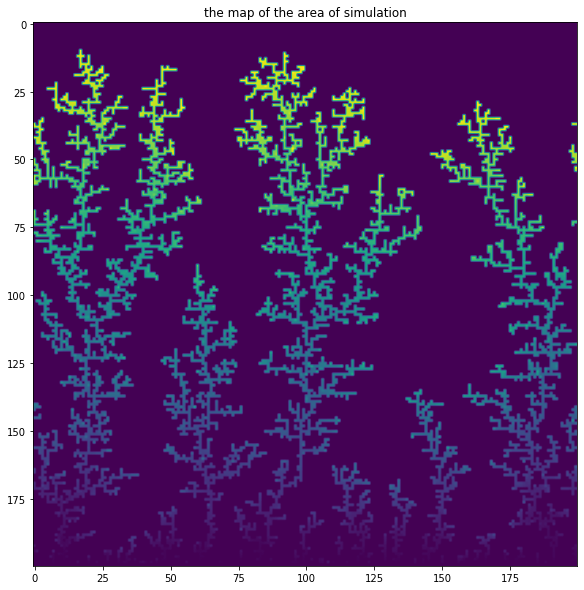

In [14]:
diffusionLimitedAggregationRandomWalk.show()